<h2>Project introduction</h2>

In [2]:
# """
# main python file to run the power flow of KU distribution system 

# External grid: A generator has been modelled as an external grid, its control is set to Slack

# Nomenclature
# -----------------
# -----------------
# HVB -> High voltage Bus
# LVB1 -> Low voltage Bus number 1
# Line1_2 -> Line connected between LVB1(low voltage bus number 1) and LVB2(bus number 2) 
# Load3 -> Load connected to LVB3(low voltage bus number 3)

# Parameters
# -------------------
# -------------------
# line resistance = 0.082 ohm/km
# line reactance = 0.07 ohm/km

# """

<h2>Import</h2>

In [3]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import cartopy.crs as ccrs
import math
import matplotlib.ticker as mticker

<h2>Create Network</h2>

In [4]:
network = pypsa.Network()

In [5]:
# add high voltage bus
network.add("Bus", "HVB", v_nom = 11.0, y = 27.61964, x = 85.536 )

# add low voltage buses
# for i in range(1,53):
#     network.add("Bus", f"LVB{i}", v_nom = 0.4)

network.add("Bus", "LVB1", v_nom = 0.4, y = 27.61964, x = 85.5367)
network.add("Bus", "LVB2", v_nom = 0.4, y = 27.61967, x = 85.53733)
network.add("Bus", "LVB3", v_nom = 0.4, y = 27.61948, x = 85.53724)
network.add("Bus", "LVB4", v_nom=0.4, y=27.619527817, x=85.537918091)
network.add("Bus", "LVB5", v_nom=0.4, y=27.6198, x=85.53804)
network.add("Bus", "LVB6", v_nom=0.4, y=27.61941, x=85.53802)
network.add("Bus", "LVB7", v_nom=0.4, y=27.61953, x=85.5383)
network.add("Bus", "LVB8", v_nom=0.4, y=27.61955, x=85.5385)
network.add("Bus", "LVB9", v_nom=0.4, y=27.6191, x=85.53842)
network.add("Bus", "LVB10", v_nom=0.4, y=27.61897, x=85.53857)
network.add("Bus", "LVB11", v_nom=0.4, y=27.619102478, x=85.538719177)
network.add("Bus", "LVB12", v_nom=0.4, y=27.61916, x=85.5388)
network.add("Bus", "LVB13", v_nom=0.4, y=27.61934, x=85.53885)
network.add("Bus", "LVB14", v_nom=0.4, y=27.61884, x=85.53873)
network.add("Bus", "LVB15", v_nom=0.4, y=27.61869, x=85.53938)
network.add("Bus", "LVB16", v_nom=0.4, y=27.61891, x=85.53925)
network.add("Bus", "LVB17", v_nom=0.4, y=27.61859, x=85.53959)
network.add("Bus", "LVB18", v_nom=0.4, y=27.61946, x=85.53967)
network.add("Bus", "LVB19", v_nom=0.4, y=27.61943, x=85.53953)
network.add("Bus", "LVB20", v_nom=0.4, y=27.61867, x=85.53896)
network.add("Bus", "LVB21", v_nom=0.4, y=27.61834, x=85.53885)
network.add("Bus", "LVB22", v_nom=0.4, y=27.61812, x=85.53921)
network.add("Bus", "LVB23", v_nom=0.4, y=27.61769, x=85.53912)
network.add("Bus", "LVB24", v_nom=0.4, y=27.61979, x=85.5371)
network.add("Bus", "LVB25", v_nom=0.4, y=27.61983, x=85.5372)
network.add("Bus", "LVB26", v_nom=0.4, y=27.61978, x=85.53751)
network.add("Bus", "LVB27", v_nom=0.4, y=27.61988, x=85.53743)
network.add("Bus", "LVB28", v_nom=0.4, y=27.62006, x=85.53776)
network.add("Bus", "LVB29", v_nom=0.4, y=27.62046, x=85.53813)
network.add("Bus", "LVB30", v_nom=0.4, y=27.62061, x=85.53827)
network.add("Bus", "LVB31", v_nom=0.4, y=27.61916, x=85.53784)
network.add("Bus", "LVB32", v_nom=0.4, y=27.6188, x=85.53804)
network.add("Bus", "LVB33", v_nom=0.4, y=27.61848, x=85.53786)
network.add("Bus", "LVB34", v_nom=0.4, y=27.61849, x=85.53833)
network.add("Bus", "LVB35", v_nom=0.4, y=27.61786, x=85.53768)
network.add("Bus", "LVB36", v_nom=0.4, y=27.61805, x=85.53786)
network.add("Bus", "LVB37", v_nom=0.4, y=27.61771, x=85.53714)
network.add("Bus", "LVB38", v_nom=0.4, y=27.61776, x=85.53674)
network.add("Bus", "LVB39", v_nom=0.4, y=27.61743, x=85.5395)
network.add("Bus", "LVB40", v_nom=0.4, y=27.61751, x=85.53745)
network.add("Bus", "LVB41", v_nom=0.4, y=27.61745, x=85.5372)
network.add("Bus", "LVB42", v_nom=0.4, y=27.61785, x=85.53823)
network.add("Bus", "LVB43", v_nom=0.4, y=27.6177, x=85.53833)
network.add("Bus", "LVB44", v_nom=0.4, y=27.61752, x=85.53911)
network.add("Bus", "LVB45", v_nom=0.4, y=27.61749, x=85.53897)
network.add("Bus", "LVB46", v_nom=0.4, y=27.619632721, x=85.538276672)
network.add("Bus", "LVB47", v_nom=0.4, y=27.61966, x=85.53875)
network.add("Bus", "LVB48", v_nom=0.4, y=27.61988, x=85.53927)
network.add("Bus", "LVB49", v_nom=0.4, y=27.61981, x=85.53934)
network.add("Bus", "LVB50", v_nom=0.4, y=27.61999, x=85.53902)
network.add("Bus", "LVB51", v_nom=0.4, y=27.61991, x=85.53953)
network.add("Bus", "LVB52", v_nom=0.4, y=27.61986, x=85.53779)


# add an external network to the high voltage bus
network.add("Generator", "External network", bus = "HVB", control = "Slack")

# add a transformer between HVB and LVB1
# network.add("Transformer", "Transformer", bus0 = "HVB", bus1 = "LVB1", model = "t", x = 0.5, r = 0.5,
#         s_nom = 0.25*1.25)
network.add("Transformer", "Transformer", bus0 = "HVB", bus1 = "LVB1", model = "t", x = 0.5, r = 0.5,
           s_nom = 99999999)

# add the lines between the low voltage buses
network.add("Line", "Line1_2", bus0 = "LVB1", bus1 = "LVB2", length = 0.039, r = 0.082*0.039, x = 0.07*0.039)
network.add("Line", "Line2_3", bus0 = "LVB2", bus1 = "LVB3", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line2_4", bus0 = "LVB2", bus1 = "LVB4", length = 0.1485, r = 0.082*0.1485, x = 0.07*0.1485)
network.add("Line", "Line4_5", bus0 = "LVB4", bus1 = "LVB5", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line4_6", bus0 = "LVB4", bus1 = "LVB6", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line4_7", bus0 = "LVB4", bus1 = "LVB7", length = 0.03774, r = 0.082*0.03774, x = 0.07*0.03774)
network.add("Line", "Line7_8", bus0 = "LVB7", bus1 = "LVB8", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line7_9", bus0 = "LVB7", bus1 = "LVB9", length = 0.04611, r = 0.082*0.04611, x = 0.07*0.04611)
network.add("Line", "Line9_10", bus0 = "LVB9", bus1 = "LVB10", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line9_11", bus0 = "LVB9", bus1 = "LVB11", length = 0.03551, r = 0.082*0.03551, x = 0.07*0.03551)
network.add("Line", "Line11_12", bus0 = "LVB11", bus1 = "LVB12", length = 0.01087, r = 0.082*0.01087, x = 0.07*0.01087)
network.add("Line", "Line12_13", bus0 = "LVB12", bus1 = "LVB13", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line12_14", bus0 = "LVB12", bus1 = "LVB14", length = 0.0307, r = 0.082*0.0307, x = 0.07*0.0307)
network.add("Line", "Line14_15", bus0 = "LVB14", bus1 = "LVB15", length = 0.04298, r = 0.082*0.04298, x = 0.07*0.04298)
network.add("Line", "Line15_16", bus0 = "LVB15", bus1 = "LVB16", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line15_17", bus0 = "LVB15", bus1 = "LVB17", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line15_18", bus0 = "LVB15", bus1 = "LVB18", length = 0.09234, r = 0.082*0.09234, x = 0.07*0.09234)
network.add("Line", "Line18_19", bus0 = "LVB18", bus1 = "LVB19", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line14_20", bus0 = "LVB14", bus1 = "LVB20", length = 0.033, r = 0.082*0.033, x = 0.07*0.033)
network.add("Line", "Line20_21", bus0 = "LVB20", bus1 = "LVB21", length = 0.06867, r = 0.082*0.06867, x = 0.07*0.06867)
network.add("Line", "Line21_22", bus0 = "LVB21", bus1 = "LVB22", length = 0.04, r = 0.082*0.04, x = 0.07*0.04)
network.add("Line", "Line21_23", bus0 = "LVB21", bus1 = "LVB23", length = 0.06259, r = 0.082*0.06259, x = 0.07*0.06259)
network.add("Line", "Line1_24", bus0 = "LVB1", bus1 = "LVB24", length = 0.0413, r = 0.082*0.0413, x = 0.07*0.0413)
network.add("Line", "Line24_25", bus0 = "LVB24", bus1 = "LVB25", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line24_26", bus0 = "LVB24", bus1 = "LVB26", length = 0.05058, r = 0.082*0.05058, x = 0.07*0.05058)
network.add("Line", "Line26_27", bus0 = "LVB26", bus1 = "LVB27", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line27_28", bus0 = "LVB27", bus1 = "LVB28", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line26_52", bus0 = "LVB26", bus1 = "LVB52", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line26_29", bus0 = "LVB26", bus1 = "LVB29", length = 0.10924, r = 0.082*0.10924, x = 0.07*0.10924)
network.add("Line", "Line29_30", bus0 = "LVB29", bus1 = "LVB30", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line4_31", bus0 = "LVB4", bus1 = "LVB31", length = 0.04907, r = 0.082*0.04907, x = 0.07*0.04907)
network.add("Line", "Line31_32", bus0 = "LVB31", bus1 = "LVB32", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line31_33", bus0 = "LVB31", bus1 = "LVB33", length = 0.04446, r = 0.082*0.04446, x = 0.07*0.04446)
network.add("Line", "Line33_34", bus0 = "LVB33", bus1 = "LVB34", length = 0.16, r = 0.082*0.16, x = 0.07*0.16)
network.add("Line", "Line33_35", bus0 = "LVB33", bus1 = "LVB35", length = 0.09695, r = 0.082*0.09695, x = 0.07*0.09695)
network.add("Line", "Line35_36", bus0 = "LVB35", bus1 = "LVB36", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line35_37", bus0 = "LVB35", bus1 = "LVB37", length = 0.05521, r = 0.082*0.05521, x = 0.07*0.05521)
network.add("Line", "Line37_38", bus0 = "LVB37", bus1 = "LVB38", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line37_39", bus0 = "LVB37", bus1 = "LVB39", length = 0.141, r = 0.082*0.141, x = 0.07*0.141)
network.add("Line", "Line37_40", bus0 = "LVB37", bus1 = "LVB40", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line40_41", bus0 = "LVB40", bus1 = "LVB41", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line35_42", bus0 = "LVB35", bus1 = "LVB42", length = 0.05915, r = 0.082*0.05915, x = 0.07*0.05915)
network.add("Line", "Line42_43", bus0 = "LVB42", bus1 = "LVB43", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line42_44", bus0 = "LVB42", bus1 = "LVB44", length = 0.05007, r = 0.082*0.05007, x = 0.07*0.05007)
network.add("Line", "Line44_45", bus0 = "LVB44", bus1 = "LVB45", length = 0.05007, r = 0.082*0.05007, x = 0.07*0.05007)
network.add("Line", "Line7_46", bus0 = "LVB7", bus1 = "LVB46", length = 0.01352, r = 0.082*0.01352, x = 0.07*0.01352)
network.add("Line", "Line46_47", bus0 = "LVB46", bus1 = "LVB47", length = 0.04956, r = 0.082*0.04956, x = 0.07*0.04956)
network.add("Line", "Line47_48", bus0 = "LVB47", bus1 = "LVB48", length = 0.05461, r = 0.082*0.05461, x = 0.07*0.05461)
network.add("Line", "Line48_49", bus0 = "LVB48", bus1 = "LVB49", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line48_50", bus0 = "LVB48", bus1 = "LVB50", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)
network.add("Line", "Line48_51", bus0 = "LVB48", bus1 = "LVB51", length = 0.03, r = 0.082*0.03, x = 0.07*0.03)

# add a load to LVB03 -> Multipurpose Hall
network.add("Load", "Load3", bus = "LVB3", p_set = 0.0621, q_set = 0)

# add loads to LVB5(Block 10) and LVB6(Block 11)
network.add("Load", "Load5", bus = "LVB5", p_set = 0.01242, q_set = 0)
network.add("Load", "Load6", bus = "LVB6", p_set = 0.01242, q_set = 0)

# add a load to LVB8(Administration)
network.add("Load", "Load8", bus = "LVB8", p_set = 0.01242, q_set = 0)

# add a load to LVB10(Library)
network.add("Load", "Load10", bus = "LVB10", p_set = 0.0621, q_set = 0)

# add a load to LVB13(CV Raman Hall)
network.add("Load", "Load13", bus = "LVB13", p_set = 0.09315, q_set = 0)

# add a load to LVB16(Science Block)
network.add("Load", "Load16", bus = "LVB16", p_set = 0.0621, q_set = 0)

# add a load to LVB17(AAC Block)
network.add("Load", "Load17", bus = "LVB17", p_set = 0.03105, q_set = 0)

# add a load to LVB19(Biotechnology Block)
network.add("Load", "Load19", bus = "LVB19", p_set = 0.0621, q_set = 0)

# add a load to LVB22(Girls hostel)
network.add("Load", "Load22", bus = "LVB22", p_set = 0.015525, q_set = 0)

# add a load to LVB23(A5 - Family Quarter)
network.add("Load", "Load23", bus = "LVB23", p_set = 0.01242, q_set = 0)

# add a load to LVB25(Mechanical Block)
network.add("Load", "Load25", bus = "LVB25", p_set = 0.03105, q_set = 0)

# add a load to LVB27(TTC_Block A)
network.add("Load", "Load27", bus = "LVB27", p_set = 0.01242, q_set = 0)

# add a load to LVB28(TTC 2)
network.add("Load", "Load28", bus = "LVB28", p_set = 0.01242, q_set = 0)

# add a load to LVB52(SOM Lab)
network.add("Load", "Load52", bus = "LVB52", p_set = 0.0621, q_set = 0)

# add a load to LVB30(ATM_NIMB)
network.add("Load", "Load30", bus = "LVB30", p_set = 0.0621, q_set = 0)

# add a load to LVB32(Pharmacy Block)
network.add("Load", "Load32", bus = "LVB32", p_set = 0.0621, q_set = 0)

# add a load to LVB36(KU MESH)
network.add("Load", "Load36", bus = "LVB36", p_set = 0.02484, q_set = 0)

# add a load to LVB38(KU Boys Hostel)
network.add("Load", "Load38", bus = "LVB38", p_set = 0.015525, q_set = 0)

# add a load to LVB40(KU_TTC)
network.add("Load", "Load40", bus = "LVB40", p_set = 0.01242, q_set = 0)

# add a load to LVB41(KU_BOYS)
network.add("Load", "Load41", bus = "LVB41", p_set = 0.015525, q_set = 0)

# add a load to LVB43(Staff Quarter)
network.add("Load", "Load43", bus = "LVB43", p_set = 0.01242, q_set = 0)

# add a load to LVB45(Nepal invesment Bank)
network.add("Load", "Load45", bus = "LVB45", p_set = 0.03105, q_set = 0)

# add a load to LVB49(Block 8)
network.add("Load", "Load49", bus = "LVB49", p_set = 0.01863, q_set = 0)

# add a load to LVB50(Block 9)
network.add("Load", "Load50", bus = "LVB50", p_set = 0.01242, q_set = 0)

# add a load to LVB51(TTL)
network.add("Load", "Load51", bus = "LVB51", p_set = 0.01242, q_set = 0)

<h2>Load Flow</h2>

In [6]:
network.consistency_check()

In [7]:
# perform newton Raphson Load Flow
network.pf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.018548 seconds


{'n_iter': SubNetwork  0
 snapshot     
 now         3,
 'error': SubNetwork             0
 snapshot                
 now         1.727667e-07,
 'converged': SubNetwork     0
 snapshot        
 now         True}

In [8]:
# active power flow through lines
network.lines_t.p0

,Line1_2,Line2_3,Line2_4,Line4_5,Line4_6,Line4_7,Line7_8,Line7_9,Line9_10,Line9_11,...,Line35_42,Line42_43,Line42_44,Line44_45,Line7_46,Line46_47,Line47_48,Line48_49,Line48_50,Line48_51
snapshot,,,,,,,,,,,,,,,,,,,,,
now,0.711086,0.062161,0.638773,0.012423,0.012423,0.405659,0.012423,0.345969,0.062171,0.280494,...,0.0436,0.012423,0.031109,0.031079,0.043616,0.0436,0.043544,0.018636,0.012423,0.012423


In [9]:
# bus voltage magnitudes in per unit
network.buses_t.v_mag_pu

Bus,HVB,LVB1,LVB2,LVB3,LVB4,LVB5,LVB6,LVB7,LVB8,LVB9,...,LVB43,LVB44,LVB45,LVB46,LVB47,LVB48,LVB49,LVB50,LVB51,LVB52
snapshot,,,,,,,,,,,,,,,,,,,,,
now,1.0,1.0,0.985036,0.984065,0.933928,0.933724,0.933724,0.925382,0.925176,0.916437,...,0.918639,0.917977,0.917108,0.925055,0.923856,0.922536,0.922225,0.922329,0.922329,0.991254


In [10]:
network.buses_t.v_mag_pu['LVB12']

snapshot
now    0.909104
Name: LVB12, dtype: float64

In [11]:
# bus voltage phase angles in degree
network.buses_t.v_ang*180/math.pi

Bus,HVB,LVB1,LVB2,LVB3,LVB4,LVB5,LVB6,LVB7,LVB8,LVB9,...,LVB43,LVB44,LVB45,LVB46,LVB47,LVB48,LVB49,LVB50,LVB51,LVB52
snapshot,,,,,,,,,,,,,,,,,,,,,
now,0.0,-2.416943e-07,-0.65023,-0.698406,-3.050629,-3.06134,-3.06134,-3.482284,-3.493194,-3.943564,...,-3.847773,-3.88291,-3.9292,-3.499494,-3.562684,-3.632504,-3.648971,-3.64348,-3.64348,-0.425833


In [12]:
# bus voltage phase angles in radian
network.buses_t.v_ang

Bus,HVB,LVB1,LVB2,LVB3,LVB4,LVB5,LVB6,LVB7,LVB8,LVB9,...,LVB43,LVB44,LVB45,LVB46,LVB47,LVB48,LVB49,LVB50,LVB51,LVB52
snapshot,,,,,,,,,,,,,,,,,,,,,
now,0.0,-4.218362e-09,-0.011349,-0.012189,-0.053244,-0.05343,-0.05343,-0.060777,-0.060968,-0.068828,...,-0.067156,-0.06777,-0.068577,-0.061078,-0.062181,-0.063399,-0.063687,-0.063591,-0.063591,-0.007432


In [13]:
network.graph

<bound method graph of PyPSA Network
Components:
 - Bus: 53
 - Generator: 1
 - Line: 51
 - Load: 26
 - SubNetwork: 1
 - Transformer: 1
Snapshots: 1>

<h2>Network Plot</h2>

In [14]:
# adjust bus colors
# the first element of bus_colors correspond to HVB. since it is set as a slack bus, 
# its color is set to cadetblue
bus_colors = ["#5F9EA0"]
bus_names = network.buses.index.to_list()
for i in range(1, 53):
   bus_voltage_pu = network.buses_t.v_mag_pu.loc['now',f'LVB{i}']
   if 0.95 < bus_voltage_pu <= 1.05:
       # cadetblue color if bus voltage is between 0.95 and 1.05pu
       bus_colors.append("#5F9EA0")
   elif (0.9 < bus_voltage_pu <= 0.95) or ((1.05 < bus_voltage_pu <= 1.1)):
       # sky blue if bus voltage is between 0.9 and 0.95 pu
       bus_colors.append("#1DA1E8") 
   else:
       # red if bus voltage is less than 0.9pu or greater than 1.1 pu
       bus_colors.append("#F15151")   
bus_colors = pd.Series(bus_colors, index=bus_names) 

In [47]:
# adjust line colors
# assume nominal line apparent capacity as 0.4 MVA
s_nom_assumed = 0.4
# calculate percentage loading
percentage_loading = (abs(network.lines_t.p0.loc['now'])/s_nom_assumed)*100
percentage_loading = abs(percentage_loading)

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



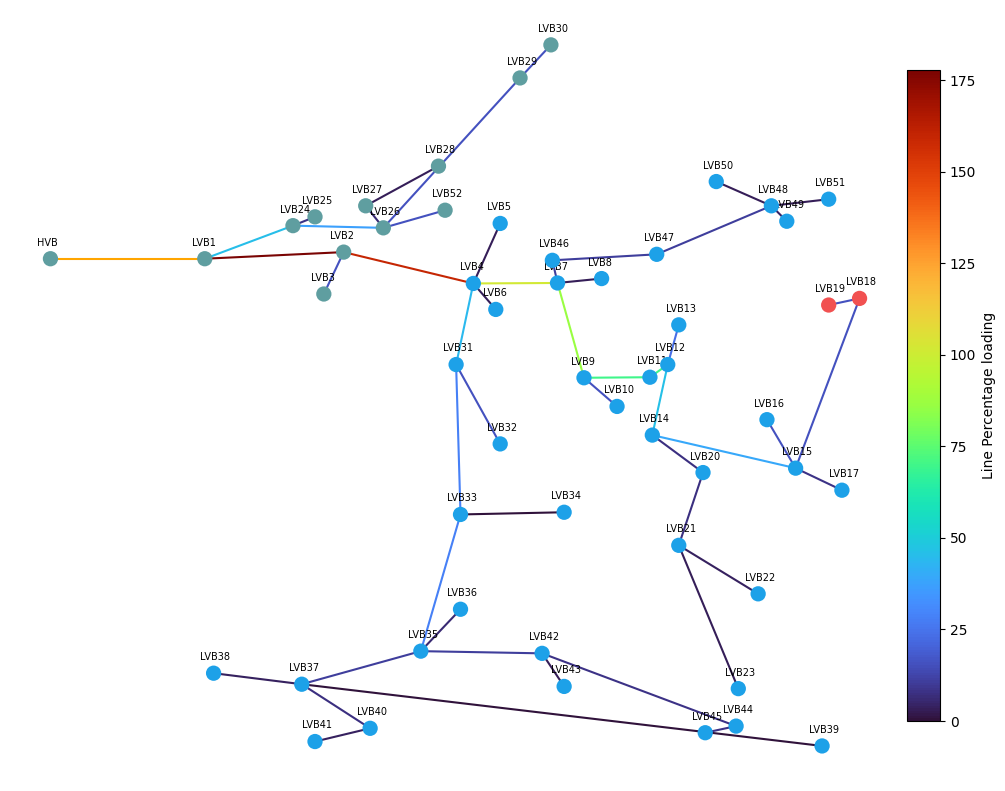

In [119]:
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()}, figsize = (12,12))
collection = network.plot(ax = ax, 
            bus_sizes = 0.0000000012, bus_colors = bus_colors,
            line_widths=1.50, line_colors=loading, line_cmap=plt.cm.turbo, line_alpha = 1.0,
             projection = ccrs.EqualEarth(),
            flow = None,
            )
heatmap = plt.colorbar(collection[1], 
             fraction = 0.035, pad = 0.008, 
             ticks = [0, 25, 50, 75, 100, 125, 150, 175],
             label = "Line Percentage loading",
            )
heatmap.ax.set_yticklabels(['0', '25', '50', '75', '100', '125', '150', '175'])

# print bus names alongside each bus
for bus in network.buses.index:
    # print bus names slightly above the bus to avoid overlap
    ax.text(network.buses.loc[bus]['x']-0.00006, network.buses.loc[bus]['y']+0.00006, f"{bus}", fontsize = 7)

# save figure in png format
plt.savefig('KU_flow_plot.png')

plt.show()

In [115]:
network.lines_t.p0/0.4*100

,Line1_2,Line2_3,Line2_4,Line4_5,Line4_6,Line4_7,Line7_8,Line7_9,Line9_10,Line9_11,...,Line35_42,Line42_43,Line42_44,Line44_45,Line7_46,Line46_47,Line47_48,Line48_49,Line48_50,Line48_51
snapshot,,,,,,,,,,,,,,,,,,,,,
now,177.771467,15.540307,159.693125,3.105679,3.105679,101.414718,3.105691,86.49226,15.542681,70.123515,...,10.899915,3.105701,7.777203,7.76985,10.903956,10.900108,10.886001,4.659066,3.105696,3.105696


<h3>Labelled Distribution system model</h3>